In [76]:
import wild_visual_navigation.visu.paper_colors as pc
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from wild_visual_navigation import WVN_ROOT_DIR

%matplotlib inline

WORKING_DIR = "/media/matias/datasets/sec_III_E_traversability_and_anomaly_learning/2023-01-26T23-18-51_test"

In [77]:
samples_directory = Path(os.path.join(WORKING_DIR, "confidence_generator"))

# Check confidence generator folder
if not samples_directory.exists():
    raise FileNotFoundError(f"Confidence generator path selected does not exists: {confidence_generator_path}")

# Load all the .pt files
steps = []
all_samples = []
positive_samples = []
gaussian_mean = []
gaussian_std = []

for s in sorted(samples_directory.rglob("*.pt")):
    data = torch.load(s)

    # Get step
    step = int(s.stem.replace("samples_", ""))

    # Save step
    steps.append(step)
    all_samples.append(data["x"].numpy())
    positive_samples.append(data["x_positive"].numpy())
    gaussian_mean.append(data["mean"].item())
    gaussian_std.append(data["std"].item())

steps = np.asarray(steps)
gaussian_mean = np.asarray(gaussian_mean)
gaussian_std = np.asarray(gaussian_std)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

N_steps = len(steps)
N_skip = 5
fig, axs = plt.subplots(N_steps, constrained_layout=True, figsize=(5, N_steps * 2))

for s in range(N_steps):
    N = 30
    bins = np.linspace(0, 15, N)
    all_hist = np.histogram(all_samples[s], bins)
    pos_hist = np.histogram(positive_samples[s], bins)

    axs[s].bar(all_hist[1][:-1], all_hist[0] / all_hist[0].max(), alpha=0.5, color="k", width=0.4)
    axs[s].bar(pos_hist[1][:-1], pos_hist[0] / pos_hist[0].max(), alpha=0.5, color=pc.paper_colors_rgba_f["blue"], width=0.4)
    axs[s].plot(bins, np.exp(-((bins - gaussian_mean[s]) ** 2) / (2 * gaussian_std[s] ** 2)), color=pc.paper_colors_rgba_f["blue"], linewidth=2)

## Plot selected steps

NameError: name 'join' is not defined

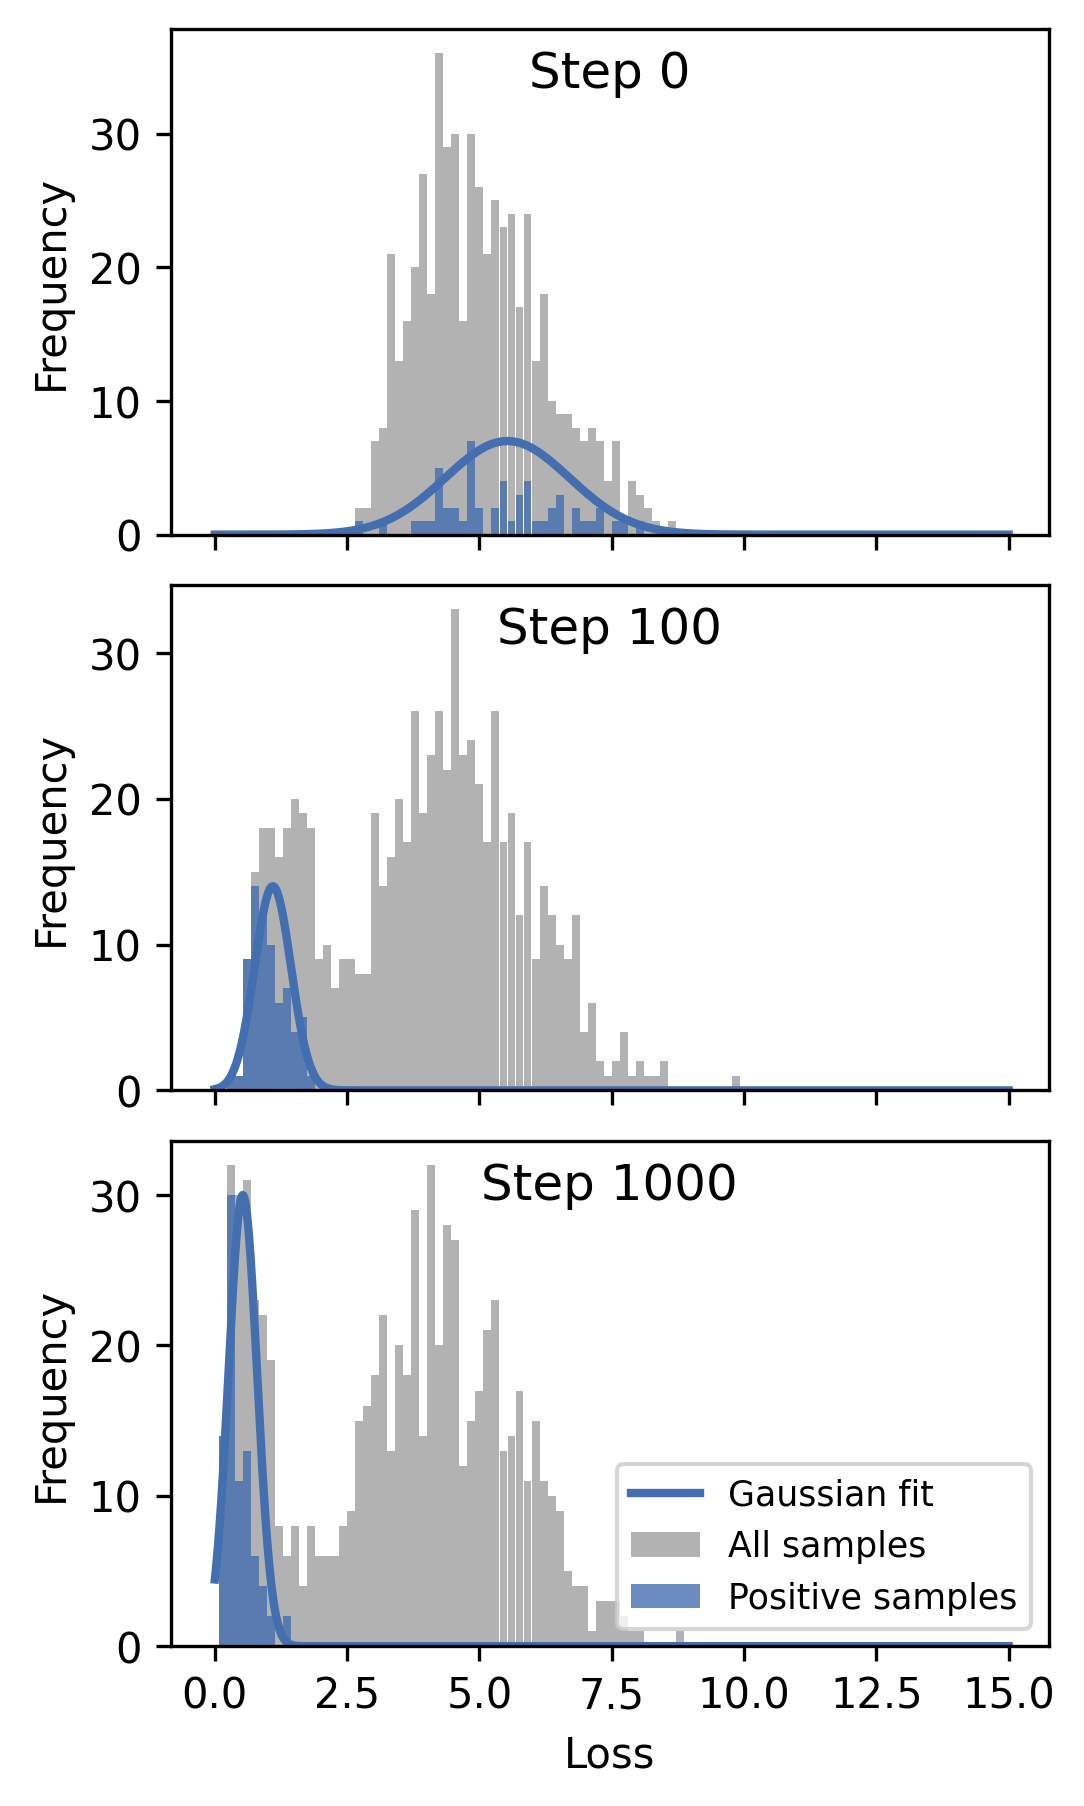

In [79]:
import matplotlib.pyplot as plt
import numpy as np

width_half_inch, width_double_inch = 88.9/25.4, 182.0/25.4
height_inch = 50/25.4
scale = 1

selected_steps = [0, 100, 1000]
N_steps = len(selected_steps)
fig, axs = plt.subplots(N_steps, constrained_layout=True, sharex=True, figsize=(width_half_inch * scale, N_steps * height_inch * scale), dpi=300)

n = 0
for i,s in enumerate(steps):
    if s not in selected_steps:
        continue
    
    N = 100
    bins = np.linspace(0, 15, N)
    all_hist = np.histogram(all_samples[i], bins)
    pos_hist = np.histogram(positive_samples[i], bins)
    max_all = all_hist[0].max()
    max_pos = pos_hist[0].max()
    normalizer = 1.0 # np.max([max_all, max_pos])
    gaussian_normalizer = max_pos / max_all

    b1 = axs[n].bar(all_hist[1][:-1], all_hist[0] / normalizer, alpha=0.3, color="k", width=0.15, label="All samples")
    b2 = axs[n].bar(pos_hist[1][:-1], pos_hist[0] / normalizer, alpha=0.8, color=pc.paper_colors_rgba_f["blue"], width=0.15, label="Positive samples")
    # Plot Gaussian with higher resolution
    bins = np.linspace(0, 15, 10*N)
    g = axs[n].plot(bins, max_pos * np.exp(-((bins - gaussian_mean[i]) ** 2) / (2 * gaussian_std[i] ** 2)), color=pc.paper_colors_rgba_f["blue"], linewidth=2, label="Gaussian fit")
    axs[n].set_title(f"Step {s}", y=1.0, pad=-14)
    axs[n].set_ylabel("Frequency")

    if n == N_steps - 1:
        axs[n].set_xlabel("Loss")
        plt.legend(loc = 'lower right', ncol=1, fontsize="small")

    n+=1

plt.savefig(fig, Path(os.join(WVN_ROOT_DIR), "results/paper/confidence_gaussian_fit.pdf"))
    

In [17]:
all_hist = all_hist / normalizer

## Plot as Markov Chain

In [ ]:
# Plot distribution over time
# samples as scatterplot
# Positive Gaussian as GP (mean + std)

# Plot stuff
fig_scale = 0.5
fig, axs = plt.subplots(1, constrained_layout=True, figsize=(fig_scale * 13, fig_scale * 9))

for s in range(len(steps)):
    step = steps[s]

    N = len(all_samples[s])
    axs.scatter(
        step * np.ones(N), all_samples[s], color=(0.2, 0.2, 0.2), alpha=0.05, linewidths=0
    )  # axs.set_xlabel("Steps")

    M = len(positive_samples[s])
    axs.scatter(
        step * np.ones(M), positive_samples[s], color=pc.paper_colors_rgb_f["blue"], alpha=0.3, linewidths=0
    )  # label="positive_samples"

std_factor = 1.5
axs.fill_between(
    steps,
    gaussian_mean * 0,
    gaussian_mean + std_factor * gaussian_std,
    color=pc.darken(pc.paper_colors_rgb_f["blue"], 0.3),
    alpha=0.2,
    linewidth=0,
)
axs.plot(
    steps,
    gaussian_mean,
    label="Gaussian approximation",
    color=pc.darken(pc.paper_colors_rgb_f["blue"], 0.3),
    linewidth=2,
)
axs.set_xlabel("Steps")
axs.set_ylabel("Reconstruction loss")
axs.legend()